In [1]:
import pandas as pd
import networkx as nx
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import defaultdict
import ndex2
import sys
from importlib import reload
sys.path.append('/cellar/users/snwright/Git/rare_common/carva')
import geneset_utils
reload(geneset_utils)

<module 'geneset_utils' from '/cellar/users/snwright/Git/rare_common/carva/geneset_utils.py'>

In [5]:
indir = '/cellar/users/snwright/Data/RareCommon/inputs/'
outdir = '/cellar/users/snwright/Data/RareCommon/outputs/'
figdir='/cellar/users/snwright/Data/Transfer/RVC/figures/GenesetFeatures/'

In [3]:
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams.update({'font.size': 7})
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams['xtick.major.width'] = 0.4
plt.rcParams['ytick.major.width'] = 0.4
plt.rcParams['xtick.minor.width'] = 0.3
plt.rcParams['ytick.minor.width'] = 0.3
plt.rcParams['legend.frameon'] = False
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['ytick.major.size'] = 3
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['ytick.minor.size'] = 2
plt.rcParams['xtick.major.pad'] = 1
plt.rcParams['ytick.major.pad'] = 1
plt.rcParams['axes.labelpad'] = 1
plt.rcParams['patch.linewidth'] = 0.25

In [6]:
with open(os.path.join(indir, 'overlap_traits_Jun27_min3_genes.txt'), 'r') as f:
    all_traits = [x.strip() for x in f.readlines()][1:]

In [9]:
feature_dir = '/cellar/users/snwright/Data/RareCommon/outputs/Features/'

## Load Network Features

In [12]:
networks = ['pcnet2_0', 'pcnet2_2', 'humannet']
results_lists = {net:[] for net in networks}
for net in networks:
    for trait in all_traits:
        results_lists[net].append(pd.read_csv(os.path.join(feature_dir, 
            f'network_stats_{net}_overlap_traits_Jun27_min3_genes.txt.{trait}'), sep='\t'))
results_df = {net:pd.concat(results_lists[net]) for net in networks}

In [13]:
results_df['pcnet2_2']

,trait,varset,subnetwork_density,n_components,average_degree,subnetwork_average_degree,clustering,subnetwork_clustering,assortativity,subnetwork_assortativity
0,EFO_0000182,rare,0.000000,4,956.750000,0.000000,0.324322,0.000000,-0.000576,NaN
1,EFO_0000182,common,0.018182,10,233.727273,0.181818,0.299138,0.000000,0.000391,NaN
2,EFO_0000182,overlap,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
3,EFO_0000182,rare_common,0.019048,13,426.533333,0.266667,0.305853,0.000000,-0.000338,-0.333333
0,EFO_0000198,rare,0.150327,9,825.777778,2.555556,0.306009,0.330952,0.000861,NaN
...,...,...,...,...,...,...,...,...,...,...
3,MONDO_0018309,rare_common,0.066667,7,544.700000,0.600000,0.248289,0.000000,0.000282,"(-0.5000000000000001, -0.1999999999999996)"
0,MONDO_0024647,rare,0.000000,15,297.333333,0.000000,0.323590,0.000000,-0.000671,NaN
1,MONDO_0024647,common,0.020000,20,199.920000,0.480000,0.271129,0.060000,0.001650,NaN
2,MONDO_0024647,overlap,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


## Global results

- results very similar across networks
- distributions appear to be pretty similar. Though it will be interesting to see how performance varies.
- Don't appear to be massive differences in distributions, and don't appear to be massive correlations between rare and common.
- Suspect many features are driven by geneset size. 

In [32]:
def plot_histograms_by_network(results_df, networks, stat_col, hue_col='varset'):
    n_subplots = len(networks)
    _, axs = plt.subplots(ncols=1, nrows=n_subplots, figsize=(5, 2*n_subplots), sharex=True)
    for i, net in enumerate(networks):
        sns.histplot(results_df[net][results_df[net].n_components != 0], x=stat_col, hue=hue_col, kde=True, 
             fill=False, stat='count', ax=axs[i])
        axs[i].set_ylabel(f'{net} Count')

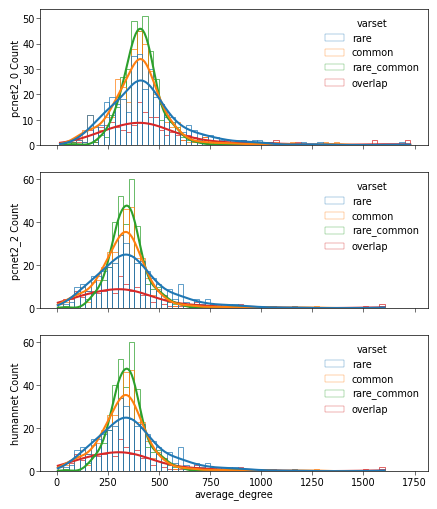

In [33]:
plot_histograms_by_network(results_df, networks, 'average_degree')

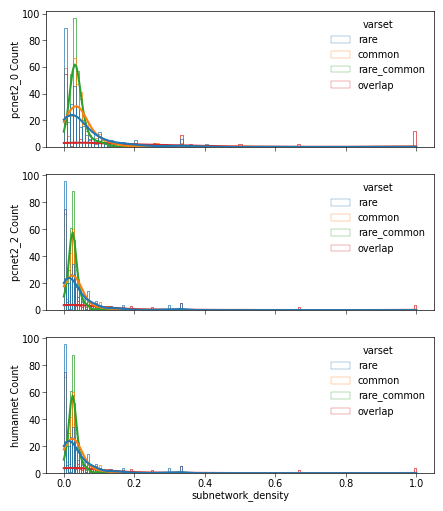

In [34]:
plot_histograms_by_network(results_df, networks, 'subnetwork_density')

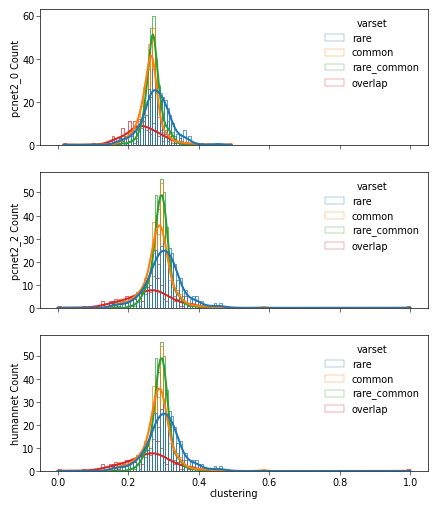

In [35]:
plot_histograms_by_network(results_df, networks, 'clustering')

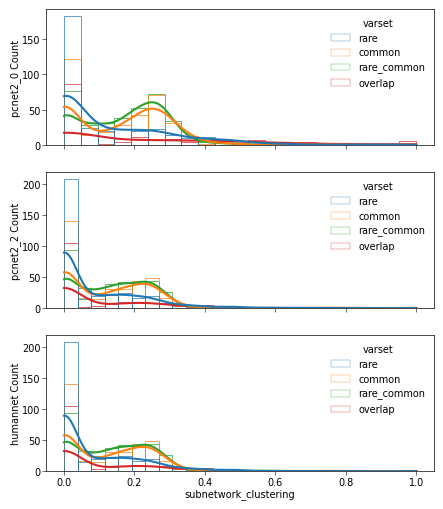

In [37]:
plot_histograms_by_network(results_df, networks, 'subnetwork_clustering')

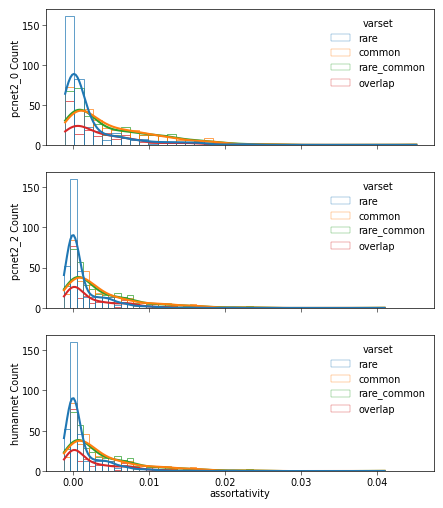

In [38]:
plot_histograms_by_network(results_df, networks, 'assortativity')

In [56]:
results_df['pcnet2_0'][results_df['pcnet2_0'].n_components != 0].loc[:, ('subnetwork_density', 'varset', 'trait')].pivot(columns = 'varset', index='trait').corr()

subnetwork_density                      \
varset                                     common   overlap      rare   
                   varset                                               
subnetwork_density common                1.000000  0.095982  0.119158   
                   overlap               0.095982  1.000000  0.378467   
                   rare                  0.119158  0.378467  1.000000   
                   rare_common           0.546359  0.089970  0.450127   

                                            
varset                         rare_common  
                   varset                   
subnetwork_density common         0.546359  
                   overlap        0.089970  
                   rare           0.450127  
                   rare_common    1.000000

In [57]:
results_df['pcnet2_0'][results_df['pcnet2_0'].n_components != 0].loc[:, ('average_degree', 'varset', 'trait')].pivot(columns = 'varset', index='trait').corr()

average_degree                                
varset                             common   overlap      rare rare_common
               varset                                                    
average_degree common            1.000000  0.316227  0.043928    0.589753
               overlap           0.316227  1.000000  0.440249    0.260381
               rare              0.043928  0.440249  1.000000    0.587753
               rare_common       0.589753  0.260381  0.587753    1.000000

In [58]:
results_df['pcnet2_0'][results_df['pcnet2_0'].n_components != 0].loc[:, ('assortativity', 'varset', 'trait')].pivot(columns = 'varset', index='trait').corr()

assortativity                                
varset                           common   overlap      rare rare_common
              varset                                                   
assortativity common           1.000000  0.349122  0.409619    0.933894
              overlap          0.349122  1.000000  0.791804    0.458690
              rare             0.409619  0.791804  1.000000    0.601806
              rare_common      0.933894  0.458690  0.601806    1.000000

In [59]:
results_df['pcnet2_0'][results_df['pcnet2_0'].n_components != 0].loc[:, ('clustering', 'varset', 'trait')].pivot(columns = 'varset', index='trait').corr()

clustering                                
varset                     common   overlap      rare rare_common
           varset                                                
clustering common        1.000000  0.476450 -0.028969    0.553955
           overlap       0.476450  1.000000  0.429535    0.366445
           rare         -0.028969  0.429535  1.000000    0.592861
           rare_common   0.553955  0.366445  0.592861    1.000000

In [60]:
results_df['pcnet2_0'][results_df['pcnet2_0'].n_components != 0].loc[:, ('subnetwork_clustering', 'varset', 'trait')].pivot(columns = 'varset', index='trait').corr()

subnetwork_clustering                      \
varset                                           common   overlap      rare   
                      varset                                                  
subnetwork_clustering common                   1.000000  0.333711  0.317730   
                      overlap                  0.333711  1.000000  0.483591   
                      rare                     0.317730  0.483591  1.000000   
                      rare_common              0.794554  0.354427  0.582018   

                                               
varset                            rare_common  
                      varset                   
subnetwork_clustering common         0.794554  
                      overlap        0.354427  
                      rare           0.582018  
                      rare_common    1.000000

In [63]:
results_df['pcnet2_0'][results_df['pcnet2_0'].n_components != 0].loc[:, ('n_components', 'varset', 'trait')].pivot(columns = 'varset', index='trait').corr()

n_components                                
varset                         common   overlap      rare rare_common
             varset                                                  
n_components common          1.000000  0.217630  0.115572    0.753687
             overlap         0.217630  1.000000  0.391292    0.144751
             rare            0.115572  0.391292  1.000000    0.611735
             rare_common     0.753687  0.144751  0.611735    1.000000

### Load PCNet2

In [2]:
ndex_server='public.ndexbio.org'

ndex_user=None
ndex_password=None
G_overlap_cx = ndex2.create_nice_cx_from_server(
        ndex_server, 
        username=ndex_user, 
        password=ndex_password, 
        uuid='d73d6357-e87b-11ee-9621-005056ae23aa')
G_overlap = G_overlap_cx.to_networkx()
print('number of nodes:')
print(len(G_overlap.nodes))
print('\nnumber of edges:')
print(len(G_overlap.edges))

number of nodes:
19267

number of edges:
3852119


In [4]:
df = nx.to_pandas_edgelist(G_overlap)

In [11]:
df.to_csv('/cellar/users/snwright/Data/Shared/PCNet2_0_edgelist.tsv', sep='\t', index=False)

In [8]:
df['Supporting_Databases'] = df['Supporting_Databases'].apply(lambda x: x.replace('"', ''))

In [10]:
df.head()

,source,target,interaction,Supporting_Databases,name,Entrez_B,Entrez_A,Number_of_Supporting_Databases
0,TGFBR1,TGFBR2,interacts-with,"HumanNet-XC,DIP,ReactomeFI(2022),FunCoup,STRIN...",TGFBR1_TGFBR2,7048,7046,12
1,TGFBR1,SMAD3,interacts-with,"HumanNet-XC,ReactomeFI(2022),FunCoup,STRING,SI...",TGFBR1_SMAD3,4088,7046,10
2,TGFBR1,TGFB1,interacts-with,"HumanNet-XC,DIP,ReactomeFI(2022),FunCoup,STRIN...",TGFBR1_TGFB1,7040,7046,12
3,TGFBR1,SMAD2,interacts-with,"HumanNet-XC,ReactomeFI(2022),FunCoup,STRING,SI...",TGFBR1_SMAD2,4087,7046,11
4,TGFBR1,TGFB3,interacts-with,"HumanNet-XC,DIP,ReactomeFI(2022),FunCoup,STRIN...",TGFBR1_TGFB3,7043,7046,9


In [5]:
node_map = pd.DataFrame({'node': G_overlap.nodes})
node_map['Entrez'] = node_map.node.apply(lambda x: G_overlap.nodes[x]['GeneID']).astype(int)

### Load gene sets

In [6]:
with open(os.path.join(indir, 'overlap_traits_Jun27_min3_genes.txt'), 'r') as f:
    all_traits = [x.strip() for x in f.readlines()][1:]

In [7]:
common_genesets = {trait: geneset_utils.load_seed_genes(trait, 'common', indir, usecol='Gene Symbol') for trait in all_traits}
rare_genesets = {trait: geneset_utils.load_seed_genes(trait, 'rare', indir, usecol='Gene Symbol') for trait in all_traits}

In [8]:
node_dict = node_map.set_index('node', drop=True).to_dict()

In [9]:
#common_entrez = {trait:[node_dict[g] if g in node_dict else g for g in genelist ] for trait, genelist in common_genesets.items() }

In [10]:
#rare_entrez = {trait:[node_dict[g] if g in node_dict else g for g in genelist ] for trait, genelist in rare_genesets.items() }

In [11]:
overlap_genesets = {trait: set(common_genesets[trait]).intersection(set(rare_genesets[trait])) for trait in all_traits}
#overlap_entrez = {trait: set(common_entrez[trait]).intersection(set(common_entrez[trait])) for trait in all_traits}

## Average Degree

In [12]:
def get_average_degree(nodes, G, stat='mean'):
    present_nodes = [n for n in nodes if n in G.nodes()]
    if len(present_nodes) == 0:
        return 0
    degrees = [G.degree[n] for n in present_nodes]
    if stat =='median':
        return np.median(degrees)
    elif stat == 'mean':
        return np.mean(degrees)

def get_all_degrees(common_genesets, rare_genesets, overlap_genesets, G_overlap, all_traits, stat='mean'):
    common_degrees = {trait: get_average_degree(common_genesets[trait], G_overlap, stat=stat) for trait in all_traits}
    rare_degrees = {trait: get_average_degree(rare_genesets[trait], G_overlap, stat=stat) for trait in all_traits}
    overlap_degrees = {trait: get_average_degree(overlap_genesets[trait], G_overlap, stat=stat) for trait in all_traits}
    degree_df = pd.DataFrame({'Common': common_degrees, 'Rare': rare_degrees, 'Overlap': overlap_degrees})
    plot_degree = degree_df.melt(var_name='Geneset', ignore_index=False, value_name='Degree')
    return degree_df, plot_degree

In [13]:
degree_df, plot_degree = get_all_degrees(common_genesets, rare_genesets, overlap_genesets, G_overlap, all_traits)

?? Why does the overlap so closely follow the common variant distribution?

,Common,Rare,Overlap
Common,1.000000,0.043928,0.177043
Rare,0.043928,1.000000,0.188895
Overlap,0.177043,0.188895,1.000000


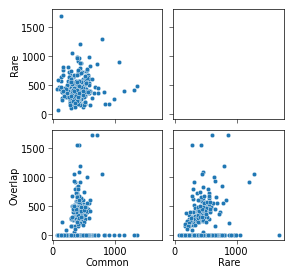

In [14]:
_, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2, figsize=(3,3), gridspec_kw={'wspace':0.1, 'hspace':0.1}, sharex=True, sharey=True)
sns.scatterplot(degree_df, x='Common', y='Rare', s = 10, ax=ax1)
sns.scatterplot(degree_df, x='Rare', y='Overlap',s = 10, ax=ax4)
sns.scatterplot(degree_df, x='Common', y='Overlap',s = 10, ax=ax3)
degree_df.corr()

<Axes: xlabel='Degree', ylabel='Count'>

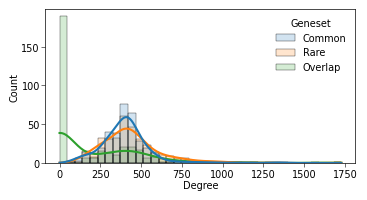

In [15]:
_ = plt.figure(figsize=(4,2))
sns.histplot(plot_degree, x='Degree', hue='Geneset', kde=True, alpha=0.2)

use median

In [16]:
med_degree_df, med_plot_degree = get_all_degrees(common_genesets, rare_genesets, overlap_genesets, G_overlap, all_traits, stat='median')

,Common,Rare,Overlap
Common,1.000000,0.116334,0.020980
Rare,0.116334,1.000000,0.207394
Overlap,0.020980,0.207394,1.000000


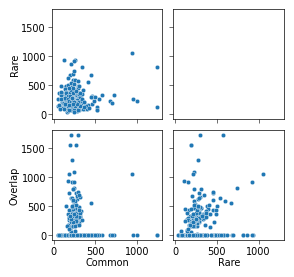

In [17]:
_, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2, figsize=(3,3), gridspec_kw={'wspace':0.1, 'hspace':0.1}, sharex=True, sharey=True)
sns.scatterplot(med_degree_df, x='Common', y='Rare', s = 10, ax=ax1)
sns.scatterplot(med_degree_df, x='Rare', y='Overlap',s = 10, ax=ax4)
sns.scatterplot(med_degree_df, x='Common', y='Overlap',s = 10, ax=ax3)
med_degree_df.corr()

<Axes: xlabel='Degree', ylabel='Count'>

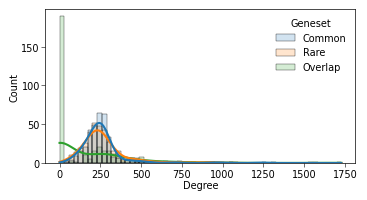

In [18]:
_ = plt.figure(figsize=(4,2))
sns.histplot(med_plot_degree, x='Degree', hue='Geneset', kde=True, alpha=0.2)

Look at gene set size

In [19]:
set_dict= {'Common':common_genesets, 'Rare':rare_genesets, 'Overlap':overlap_genesets}

In [20]:
set_sizes = {'Common': {trait: len(common_genesets[trait]) for trait in common_genesets},
            'Rare': {trait: len(rare_genesets[trait]) for trait in rare_genesets},
            'Overlap': {trait: len(overlap_genesets[trait]) for trait in overlap_genesets}}

In [21]:
size_df = pd.DataFrame(set_sizes).melt(var_name='Geneset', value_name='Size', ignore_index=False)
size_df['Trait'] = size_df.index.values

In [22]:
degree_size_df = plot_degree.merge(size_df, on=['Trait', 'Geneset'])

KeyError: 'Trait'

In [ ]:
pcnet_mean_degree = np.mean([x[1] for x in G_overlap.degree])

In [ ]:
degree_size_df['ResidualDegree'] = degree_size_df.Degree - pcnet_mean_degree

In [ ]:
_ = plt.figure(figsize=(3,3))
sns.scatterplot(degree_size_df, x='Size', y='Degree', hue='Geneset', s=5)
plt.hlines(y=pcnet_mean_degree, xmin=1, xmax=1500, color='red')
#plt.yscale('log')
plt.xscale('log')

In [ ]:
_ = plt.figure(figsize=(3,3))
sns.histplot(degree_size_df, x='ResidualDegree', hue='Geneset', kde=True)

### Degree-Score Correlation

In [73]:
from scipy.stats import spearmanr, pearsonr
def get_degree_score_correlation(trait, rare=True):
    if rare:
        file_suff='RV'
    else:
        file_suff='CV'
    gene_profile = pd.read_csv(os.path.join(indir, f"{trait}_{file_suff}.txt"), usecols=['Gene Symbol', 'P-value'], 
                                 sep='\t').sort_values(by='P-value').drop_duplicates(subset='Gene Symbol', keep='first')
    gene_profile['degree'] = gene_profile['Gene Symbol'].apply(lambda x: G_overlap.degree[x] if x in G_overlap.nodes() else np.nan)
    gene_profile['log10P'] = gene_profile['P-value'].apply(lambda x: -1 * np.log10(max(x, 1e-250)))
    if len(gene_profile) < 5:
        return np.nan
    return spearmanr(gene_profile.degree, gene_profile.log10P, nan_policy='omit').statistic

In [74]:
c_corr = []
r_corr = []
for trait in all_traits:
    c_corr.append(get_degree_score_correlation(trait, rare=False))
    r_corr.append(get_degree_score_correlation(trait, rare=True))

/cellar/users/snwright/anaconda3/envs/carva/lib/python3.10/site-packages/scipy/stats/_mstats_basic.py:695: RuntimeWarning: invalid value encountered in divide
  t = rs * np.sqrt((dof / ((rs+1.0) * (1.0-rs))).clip(0))
/cellar/users/snwright/anaconda3/envs/carva/lib/python3.10/site-packages/scipy/stats/_mstats_basic.py:695: RuntimeWarning: invalid value encountered in divide
  t = rs * np.sqrt((dof / ((rs+1.0) * (1.0-rs))).clip(0))


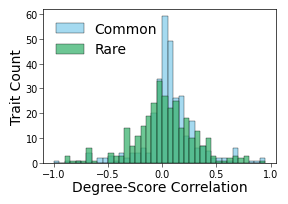

In [95]:
_ = plt.figure(figsize=(3, 2))
sns.histplot(c_corr, bins=[i/20 - 1 for i in range(0, 40)], color='skyblue', label='Common')
sns.histplot(r_corr, bins=[i/20 - 1 for i in range(0, 40)], color='mediumseagreen', label='Rare')
plt.legend(fontsize=10)
plt.xlabel('Degree-Score Correlation', fontsize=10)
plt.ylabel('Trait Count', fontsize=10)
plt.savefig(os.path.join(figdir, 'Degree_Score_Correlations.jpg'), dpi=400, bbox_inches='tight')

In [66]:
get_degree_score_correlation('EFO_0000095', rare=False)

SignificanceResult(statistic=0.040182015212721314, pvalue=0.777309337672681)

In [ ]:
rare_genesets = {trait: geneset_utils.load_seed_genes(trait, 'rare', indir, usecol='Gene Symbol') for trait in all_traits}

## Clustering Coefficient

In [ ]:
def get_clustering_coef_subgraph(nodes, G):
    present_nodes = [n for n in nodes if n in G.nodes()]
    if len(present_nodes) == 0:
        return 0
    clustering_coef = nx.average_clustering(G.subgraph(present_nodes), present_nodes, count_zeros=True)
    return clustering_coef

def get_all_clustering_coefs(common_genesets, rare_genesets, overlap_genesets, G_overlap, all_traits, stat='mean'):
    common_clustering_coefs  = {}
    rare_clustering_coefs = {}
    overlap_clustering_coefs = {}    
    for trait in tqdm(all_traits):
        common_clustering_coefs[trait] = get_clustering_coef(common_genesets[trait], G_overlap)
        rare_clustering_coefs[trait] = get_clustering_coef(rare_genesets[trait], G_overlap)
        overlap_clustering_coefs[trait] = get_clustering_coef(overlap_genesets[trait], G_overlap)
    clustering_coef_df = pd.DataFrame({'Common': common_clustering_coefs, 'Rare': rare_clustering_coefs, 'Overlap': overlap_clustering_coefs})
    plot_clustering_coef = clustering_coef_df.melt(var_name='Geneset', ignore_index=False, value_name='clustering_coef')
    return clustering_coef_df, plot_clustering_coef

In [ ]:
clust_df, plot_clust = get_all_clustering_coefs(common_genesets, rare_genesets, overlap_genesets, G_overlap, all_traits)

In [ ]:
clust_df.to_csv(os.path.join(outdir, 'EFO_terms_average_clustering.csv'))

## Assortativity

In [ ]:
# assign attribute to graph (present in x gene set)
# calculate the assortativity. 

## Development

In [ ]:
datadir = '/cellar/users/snwright/Data/NetColocTest/'

In [ ]:
go_genesets = load_node_sets(os.path.join(datadir, 'Reference','go.test' ))

In [ ]:
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 50)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 50)

In [ ]:
x = pd.DataFrame.from_dict(dict(nx.all_pairs_shortest_path_length(G)))

In [ ]:
x

In [ ]:
node_map = pd.DataFrame({'node': G_overlap.nodes})
node_map['Entrez'] = node_map.node.apply(lambda x: G_overlap.nodes[x]['GeneID'])

## Average degree

In [ ]:
degrees = pd.read_csv(os.path.join(datadir, 'inputs', 'GO', 'pcnet2_0_degrees.txt'), sep='\t', names=['Degree'], header=None, index_col=0)

In [ ]:
avg_degree = defaultdict(float)
med_degree = defaultdict(float)
for gs in go_genesets:
    gs_degree = []
    for gene in go_genesets[gs]:
        if gene in degrees.index:
            gs_degree.append(degrees.loc[gene].Degree)
    avg_degree[gs] = np.mean(gs_degree)
    med_degree[gs] = np.median(gs_degree)

In [ ]:
med_degree

## Clustering/Average Shortest Path

## Assortative Clustering

This will be more relevant with real gene sets?